Binary classification of problem of students graduating or dropping out
Algorithm: K-Nearest_Neighbor (KNN)
Author: Demetreous Stillman

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
# Load Data, Prepocessing, and Split

# Load the CSV file into a dataFrame
df_with_enrolled = pd.read_csv("/Users/demetreousstillman/Desktop/CSE_5160_Project/dropout_data.csv", sep=";")

# Filter rows where the 'Target' column is not equal to 'Enrolled'
df = df_with_enrolled[df_with_enrolled['Target'] != 'Enrolled']

# Define a mapping dictionary to convert categories to numerical values
target_mapping = {'Graduate': 0, 'Dropout': 1}
# Use the mapping dictionary to replace values in the "Target" column
df['Target'] = df['Target'].replace(target_mapping)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

# Fit and transform the DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# X contains all columns except the "Target" column
X = df_normalized.drop("Target", axis=1) 
# y contains only the "Target" column
y = df_normalized["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

/var/folders/9g/2y_gmxqn22l8hl960qphhhmw0000gn/T/ipykernel_92570/1308305600.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].replace(target_mapping)


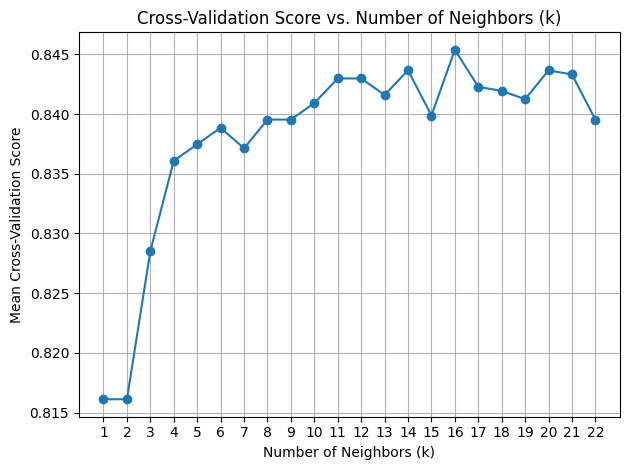

In [3]:
# Shows the cross validation scores for a range of k values so the best one can be selected.

# Initialize lists to store results
k_values = list(range (1, 23) ) #k values from 1 to 20
cv_scores_mean = []
cv_scores_std = []

# Perform cross-validation for different k values
for k in k_values:
    knn_cv = KNeighborsClassifier(n_neighbors = k, weights = "distance")
    knn_cv.fit(X_train, y_train)
    cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=10) # 5-fold cross-validation
    cv_scores_mean.append(cv_scores.mean())
    cv_scores_std.append(cv_scores.std())

# Plotting the cross-validation scores
plt.plot(k_values, cv_scores_mean, marker= 'o')
plt.title('Cross-Validation Score vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Score')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Creates the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=16, weights="distance")
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16, weights='distance')

In [17]:
# Prints the cross validation scores as well as the mean Cross Validation Score
scores = cross_val_score(knn, X_train, y_train, cv=10)
print("Cross Validation Scores Array:")
print(scores)
print("\nMean Cross Validation Score:", np.mean(scores))
print("Standard Deviation of Cross Validation Scores:", np.std(scores))

Cross Validation Scores Array:
[0.8556701  0.86597938 0.82817869 0.82817869 0.82758621 0.86206897
 0.86896552 0.83448276 0.82413793 0.85862069]

Mean Cross Validation Score: 0.8453868941817753
Standard Deviation of Cross Validation Scores: 0.01737440243660423


In [18]:
# Evaluate training accuracy
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate test accuracy
y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.8196


In [19]:
# Evaluate training error
train_error = mean_squared_error(y_train, y_train_pred)
print(f"Training Error: {train_error:.4f}")

# Evaluate test accuracy
test_error = mean_squared_error(y_test, y_test_pred)
print(f"Test Error: {test_error:.4f}")

Training Error: 0.0000
Test Error: 0.1804


In [20]:
target_names = ['Graduate', 'Dropout']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

    Graduate       0.80      0.95      0.87       449
     Dropout       0.89      0.60      0.72       277

    accuracy                           0.82       726
   macro avg       0.84      0.78      0.79       726
weighted avg       0.83      0.82      0.81       726



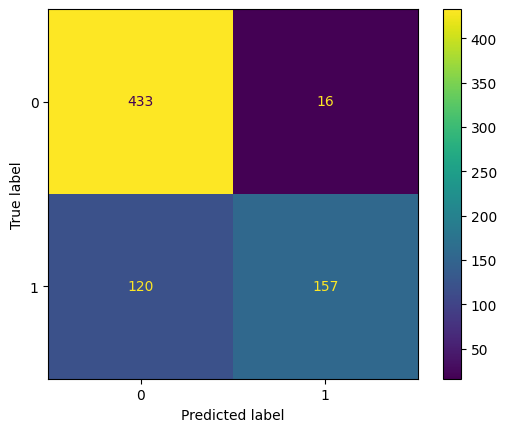

In [15]:
nncm= confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=nncm)
#disp.ax_.set_title("Confusion matrix")
disp.plot()
plt.show()